In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import math

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

%matplotlib inline

g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

In [2]:
tokenizer =Tokenizer()

In [3]:
data = open('Text Generation/poem.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'of': 5, 'my': 6, 'in': 7, 'a': 8, 'that': 9, 'me': 10, 'for': 11, 'with': 12, 'thy': 13, 'but': 14, 'thou': 15, 'is': 16, 'love': 17, 'all': 18, 'you': 19, 'as': 20, 'be': 21, 'so': 22, 'not': 23, 'when': 24, 'on': 25, 'it': 26, 'thee': 27, 'your': 28, 'by': 29, 'her': 30, 'his': 31, 'from': 32, 'she': 33, 'was': 34, 'no': 35, 'this': 36, 'are': 37, 'will': 38, 'they': 39, 'which': 40, 'then': 41, 'or': 42, 'have': 43, 'if': 44, 'he': 45, 'do': 46, 'their': 47, 'heart': 48, 'one': 49, 'doth': 50, 'more': 51, 'sweet': 52, 'now': 53, 'what': 54, 'where': 55, 'old': 56, 'o': 57, 'shall': 58, 'at': 59, 'were': 60, 'can': 61, 'ill': 62, 'mine': 63, 'time': 64, 'eyes': 65, 'fair': 66, 'like': 67, 'still': 68, 'true': 69, 'than': 70, 'see': 71, 'did': 72, 'there': 73, 'beauty': 74, 'art': 75, 'nor': 76, 'yet': 77, 'day': 78, 'we': 79, 'should': 80, 'make': 81, 'him': 82, 'oh': 83, 'never': 84, 'away': 85, 'night': 86, 'how': 87, 'well': 88, 'them': 89, '

In [4]:
input_sequences=[]

for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['from'])
print(tokenizer.word_index['fairest'])

32
466


In [6]:
print(xs[32])


[   0    0    0    0    0    0    0    0    0    0    0    0    0 2244
   13]


In [7]:
print(ys[32])


[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(tokenizer.word_index)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'of': 5, 'my': 6, 'in': 7, 'a': 8, 'that': 9, 'me': 10, 'for': 11, 'with': 12, 'thy': 13, 'but': 14, 'thou': 15, 'is': 16, 'love': 17, 'all': 18, 'you': 19, 'as': 20, 'be': 21, 'so': 22, 'not': 23, 'when': 24, 'on': 25, 'it': 26, 'thee': 27, 'your': 28, 'by': 29, 'her': 30, 'his': 31, 'from': 32, 'she': 33, 'was': 34, 'no': 35, 'this': 36, 'are': 37, 'will': 38, 'they': 39, 'which': 40, 'then': 41, 'or': 42, 'have': 43, 'if': 44, 'he': 45, 'do': 46, 'their': 47, 'heart': 48, 'one': 49, 'doth': 50, 'more': 51, 'sweet': 52, 'now': 53, 'what': 54, 'where': 55, 'old': 56, 'o': 57, 'shall': 58, 'at': 59, 'were': 60, 'can': 61, 'ill': 62, 'mine': 63, 'time': 64, 'eyes': 65, 'fair': 66, 'like': 67, 'still': 68, 'true': 69, 'than': 70, 'see': 71, 'did': 72, 'there': 73, 'beauty': 74, 'art': 75, 'nor': 76, 'yet': 77, 'day': 78, 'we': 79, 'should': 80, 'make': 81, 'him': 82, 'oh': 83, 'never': 84, 'away': 85, 'night': 86, 'how': 87, 'well': 88, 'them': 89, '

In [9]:
model=Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=45, verbose=1)
print(model)

Epoch 1/45
27500/27500 [==============================] - 54s 2ms/sample - loss: 7.0069 - accuracy: 0.0449
Epoch 2/45
27500/27500 [==============================] - 52s 2ms/sample - loss: 6.5008 - accuracy: 0.0575
Epoch 3/45
27500/27500 [==============================] - 51s 2ms/sample - loss: 6.1818 - accuracy: 0.0732
Epoch 4/45
27500/27500 [==============================] - 52s 2ms/sample - loss: 5.8402 - accuracy: 0.0853
Epoch 5/45
27500/27500 [==============================] - 55s 2ms/sample - loss: 5.4777 - accuracy: 0.0984
Epoch 6/45
27500/27500 [==============================] - 50s 2ms/sample - loss: 5.1077 - accuracy: 0.1156
Epoch 7/45
27500/27500 [==============================] - 49s 2ms/sample - loss: 4.7404 - accuracy: 0.1409
Epoch 8/45
27500/27500 [==============================] - 49s 2ms/sample - loss: 4.3801 - accuracy: 0.1757s - loss: 4.378
Epoch 9/45
27500/27500 [==============================] - 49s 2ms/sample - loss: 4.0281 - accuracy: 0.2233
Epoch 10/45
27500/2750

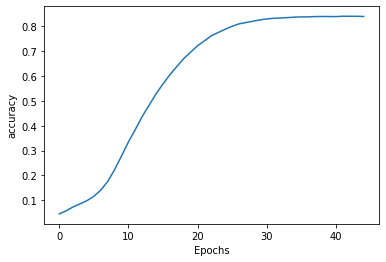

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')


In [30]:
seed_text = "with the moon light off\n"
next_words = 100
i=1  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    if i%6==0:
        seed_text += "\n" + output_word
    else:
        seed_text += " " + output_word
        
    i =i+1
        
print(seed_text)

with the moon light off
 with the blue brave her
her young hand and no fathers
hallow'd meet my eyes gone alas
right eyes can lose your bride
right your stool fast high lest
bride runn'st wise fast carve wise
fast fearful hairs lest hate' riper
fast riper poison riper carve mother's
lest cunning phil hairs phil wind
creation trade lascivious this lest rogue
handsome danny offices meet meet til
a call like me there is
eight more on your eyes can
gone your eyes is gone no
eyes is gone here gone like
to go your hand and your
eyes on your eyes light


In [12]:
import gzip, json

In [13]:
for line in gzip.open("DataSets/gutenberg-poetry-v001.ndjson.gz"):
    allLines.append(json.loads(line.strip()))

NameError: name 'allLines' is not defined

In [ ]:
import random

In [ ]:
random.sample(allLines,8)

In [ ]:
from collections import namedtuple


In [ ]:
with open('Poems/gutenberg-poetry-v001.ndjson') as json_file:
    data= json.loads(json_file)